<a href="https://colab.research.google.com/github/Swapnil-Giram/Clustring/blob/main/migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About The data

Data showing the movement of LinkedIn members across the world at the country, industry, and skill level.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

### Loding Data

In [2]:
data = '/content/drive/MyDrive/skill_migration_public.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.columns

Index(['country_code', 'country_name', 'wb_income', 'wb_region',
       'skill_group_id', 'skill_group_category', 'skill_group_name',
       'net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017',
       'net_per_10K_2018', 'net_per_10K_2019', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

### Data Cleaning

In [5]:
# droping the unnamed columns
df.drop(['Unnamed: 12','Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],axis=1,inplace=True)

In [6]:
df.head()

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549.0,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608.0,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806.0,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321.0,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606.0,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64


In [7]:
df.isna().sum() # cheacking a null values

country_code            3030
country_name            3030
wb_income               3030
wb_region               3030
skill_group_id          3030
skill_group_category    3030
skill_group_name        3030
net_per_10K_2015        3030
net_per_10K_2016        3030
net_per_10K_2017        3030
net_per_10K_2018        3030
net_per_10K_2019        3030
dtype: int64

In [8]:
# droping the null values
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

country_code            0
country_name            0
wb_income               0
wb_region               0
skill_group_id          0
skill_group_category    0
skill_group_name        0
net_per_10K_2015        0
net_per_10K_2016        0
net_per_10K_2017        0
net_per_10K_2018        0
net_per_10K_2019        0
dtype: int64

In [10]:
df.nunique()

country_code              140
country_name              140
wb_income                   4
wb_region                   7
skill_group_id            249
skill_group_category        5
skill_group_name          249
net_per_10K_2015        15023
net_per_10K_2016        14958
net_per_10K_2017        14863
net_per_10K_2018        14925
net_per_10K_2019        14887
dtype: int64

In [11]:
for column in df.columns:
  print('---------------------------')
  print(df[column].value_counts())

---------------------------
country_code
us    249
gb    249
ca    245
au    244
fr    241
     ... 
ye     34
ga     33
bf     27
bj     23
tg     17
Name: count, Length: 140, dtype: int64
---------------------------
country_name
United States     249
United Kingdom    249
Canada            245
Australia         244
France            241
                 ... 
Yemen, Rep.        34
Gabon              33
Burkina Faso       27
Benin              23
Togo               17
Name: count, Length: 140, dtype: int64
---------------------------
wb_income
High income            8904
Upper middle income    4335
Lower middle income    3240
Low income             1138
Name: count, dtype: int64
---------------------------
wb_region
Europe & Central Asia         6222
East Asia & Pacific           2872
Middle East & North Africa    2659
Latin America & Caribbean     2502
Sub-Saharan Africa            1993
South Asia                     875
North America                  494
Name: count, dtype: int64
---

In Dataset,


1. there are 140 unique countries
2. in Wb_income column 5 types of income group
3. in wb_region 7 types of regions
4. in skill_group_category 5 diffrent categories
5. in skill_group_name 249 diffrent skills





In [12]:
df.columns

Index(['country_code', 'country_name', 'wb_income', 'wb_region',
       'skill_group_id', 'skill_group_category', 'skill_group_name',
       'net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017',
       'net_per_10K_2018', 'net_per_10K_2019'],
      dtype='object')

In [19]:
# create a column avg value of people from 2015 to 2019
df["avg_net_per_10k"] = df[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017',
       'net_per_10K_2018', 'net_per_10K_2019']].mean(axis=1)
df.head()

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,avg_net_per_10k
0,af,Afghanistan,Low income,South Asia,2549.0,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79,-787.444
1,af,Afghanistan,Low income,South Asia,2608.0,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09,-928.434
2,af,Afghanistan,Low income,South Asia,3806.0,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64,-925.160
3,af,Afghanistan,Low income,South Asia,50321.0,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51,-779.356
4,af,Afghanistan,Low income,South Asia,1606.0,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64,-898.910


### Data visualisation

wb_income
High income             58.440723
Low income            -135.617297
Lower middle income   -104.727988
Upper middle income   -152.003144
Name: avg_net_per_10k, dtype: float64


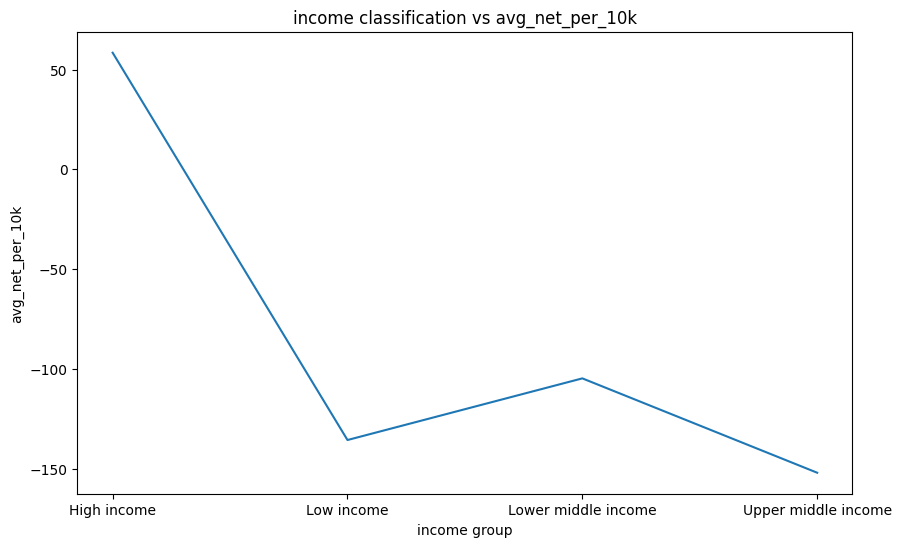

In [28]:
# monitoring the migration of people from diffrent income categories
a = df.groupby("wb_income")["avg_net_per_10k"].mean()
print(a)
plt.figure(figsize=(10,6))
plt.plot(a)
plt.title("income classification vs avg_net_per_10k")
plt.xlabel('income group')
plt.ylabel('avg_net_per_10k')
plt.show()

wb_region
East Asia & Pacific            18.477263
Europe & Central Asia          14.488442
Latin America & Caribbean    -139.446722
Middle East & North Africa    -70.041193
North America                  43.347304
South Asia                   -189.181159
Sub-Saharan Africa            -48.262520
Name: avg_net_per_10k, dtype: float64


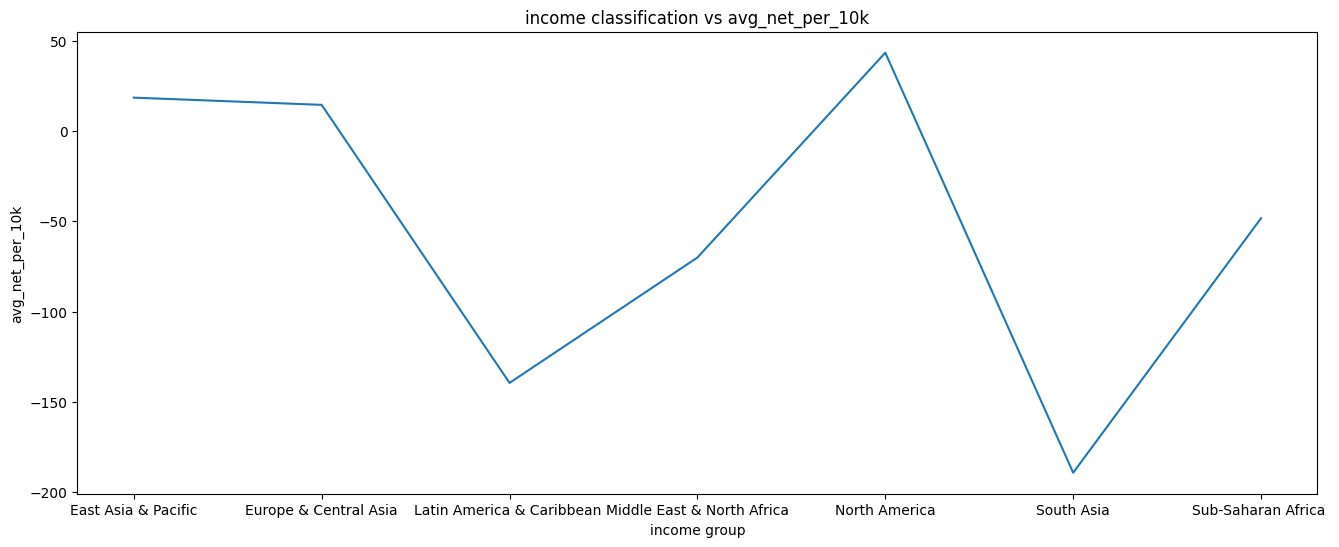

In [36]:
# monitoring the migration of people on diffrent regions
a = df.groupby("wb_region")["avg_net_per_10k"].mean()
print(a)
plt.figure(figsize=(16,6))
plt.plot(a)
plt.title("wb_region vs avg_net_per_10k")
plt.xlabel('income group')
plt.ylabel('avg_net_per_10k')
plt.show()

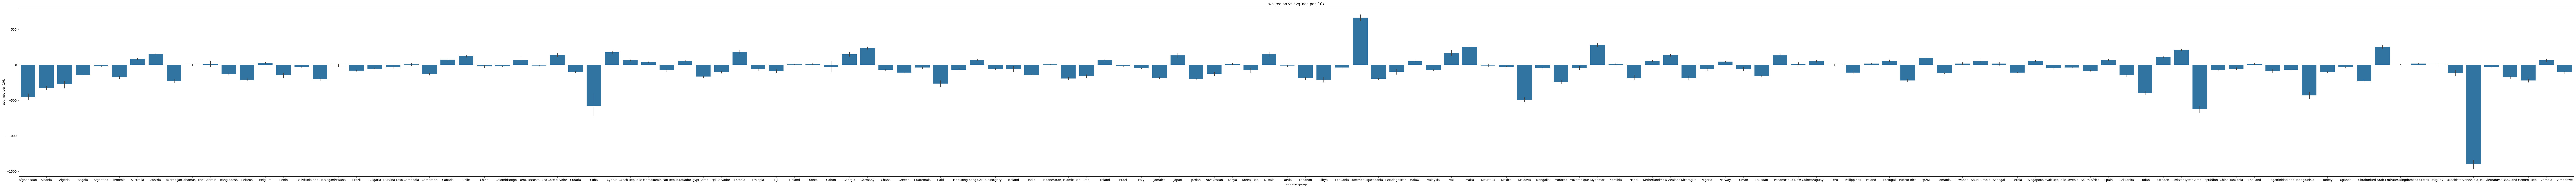

In [53]:
a = df[df['skill_group_category']=='Tech Skills']['avg_net_per_10k']
# checking outflow inflow of people in all countries
plt.figure(figsize=(150,10))
sns.barplot(y=df['avg_net_per_10k'],x=df['country_name'])
plt.title("wb_region vs avg_net_per_10k")
plt.xlabel('income group')
plt.ylabel('avg_net_per_10k')
plt.show()

<ipython-input-84-d486734b7265>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_data, y=skill_groups, palette='viridis')


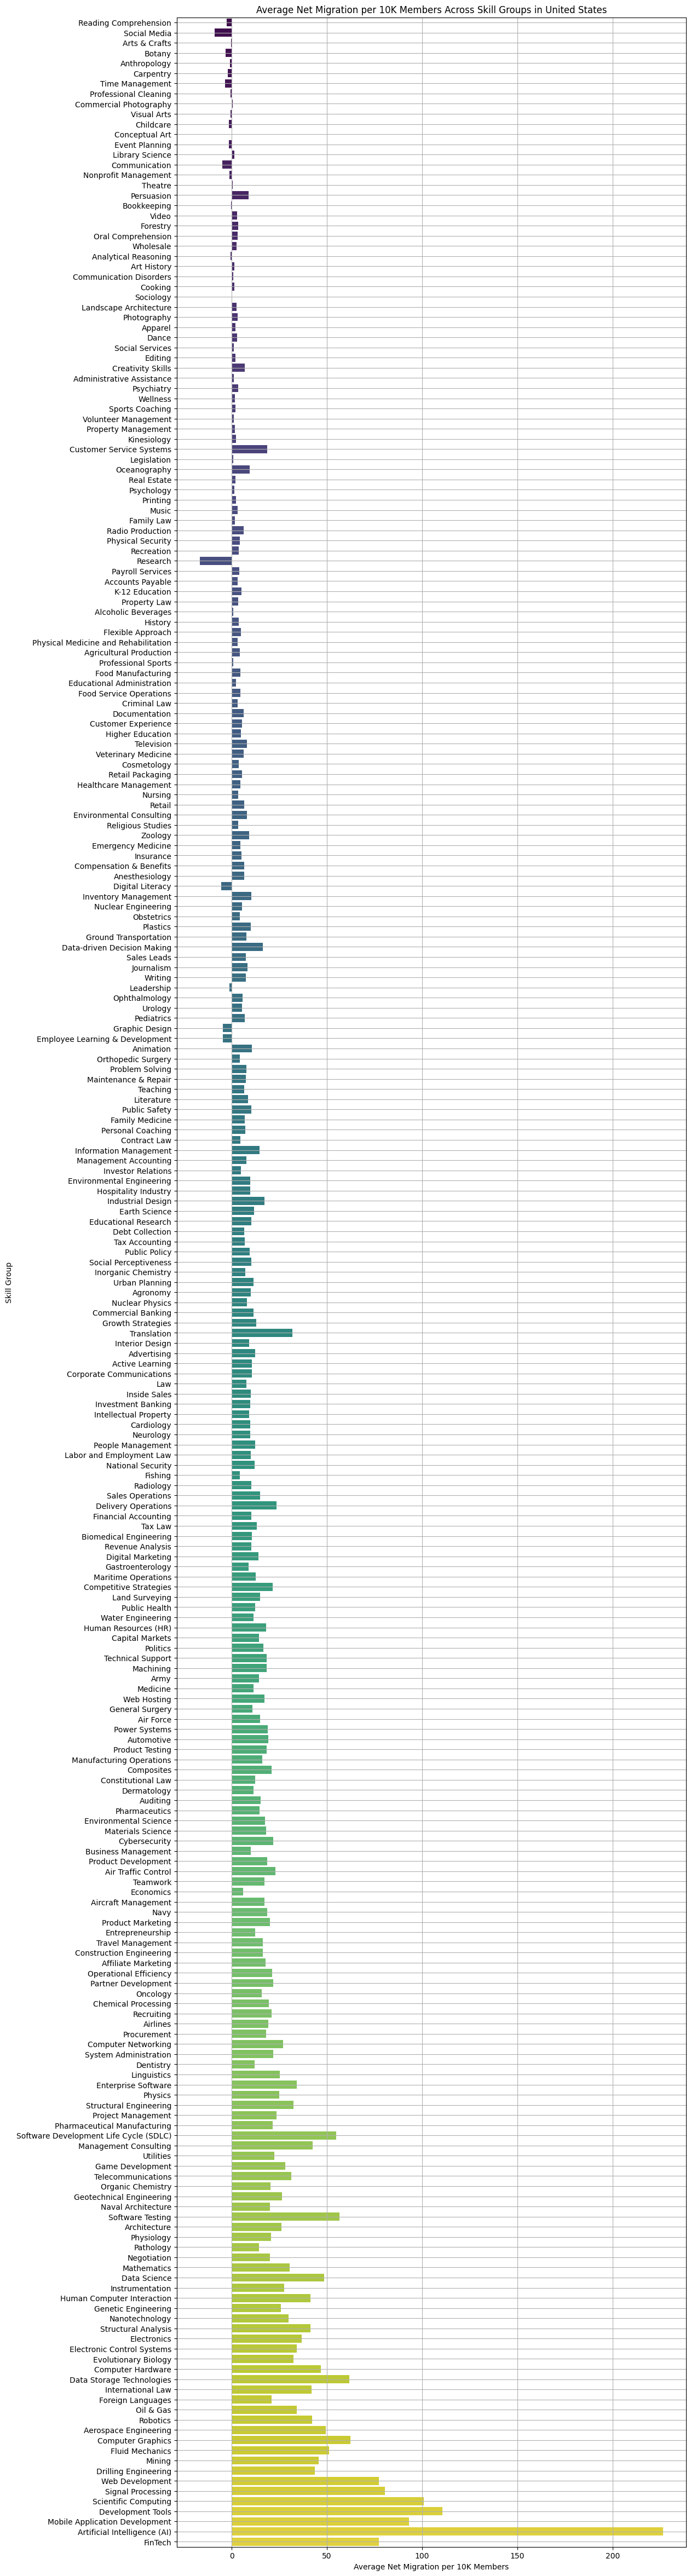

In [84]:
country = 'United States'
country_data = df[df['country_name'] == country]

# Calculate average net migration across skill groups
year_data = country_data['avg_net_per_10k']  # Assuming 'avg_net_per_10k' is calculated correctly in your dataset
skill_groups = country_data['skill_group_name']

# Plotting
plt.figure(figsize=(12, 60))
sns.barplot(x=year_data, y=skill_groups, palette='viridis')
plt.title(f'Average Net Migration per 10K Members Across Skill Groups in {country}')
plt.xlabel('Average Net Migration per 10K Members')
plt.ylabel('Skill Group')
plt.grid(True)
plt.show()

<ipython-input-83-f56b5cba4577>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_data.values, y=skill, palette='viridis')


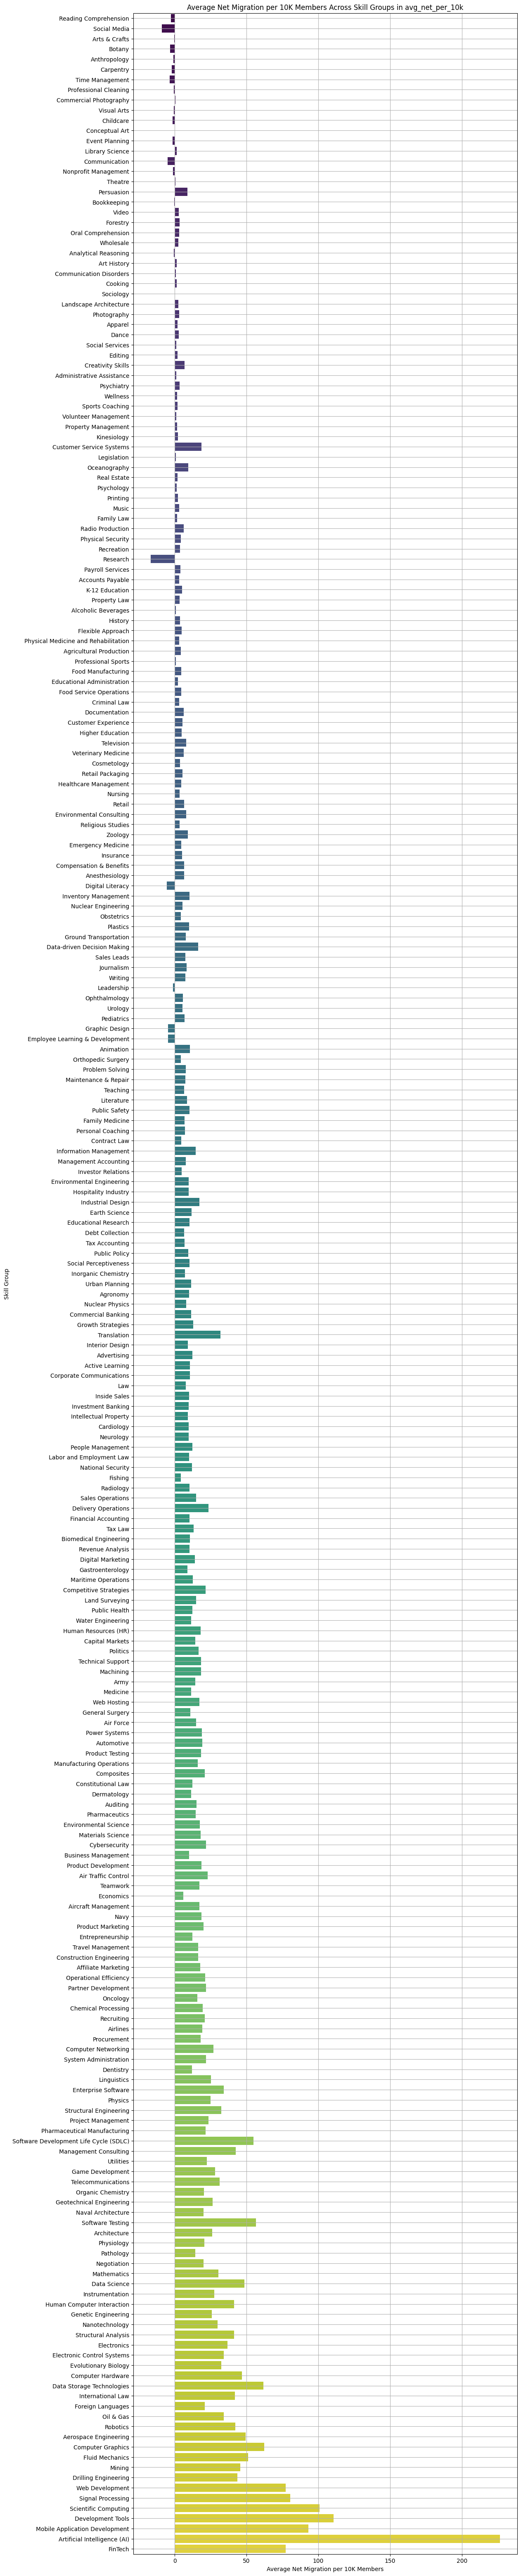

In [83]:
year = 'avg_net_per_10k'

year_data = df[df['country_name']=='United States'][year]
skill = df[df['country_name']=='United States']['skill_group_name']

plt.figure(figsize=(12, 80))
sns.barplot(x=year_data.values, y=skill, palette='viridis')
plt.title(f'Average Net Migration per 10K Members Across Skill Groups in {year}')
plt.xlabel('Average Net Migration per 10K Members')
plt.ylabel('Skill Group')
plt.grid(True)
plt.show()


<ipython-input-61-f2c633072b3c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_data.values, y=year_data.index, palette='viridis')


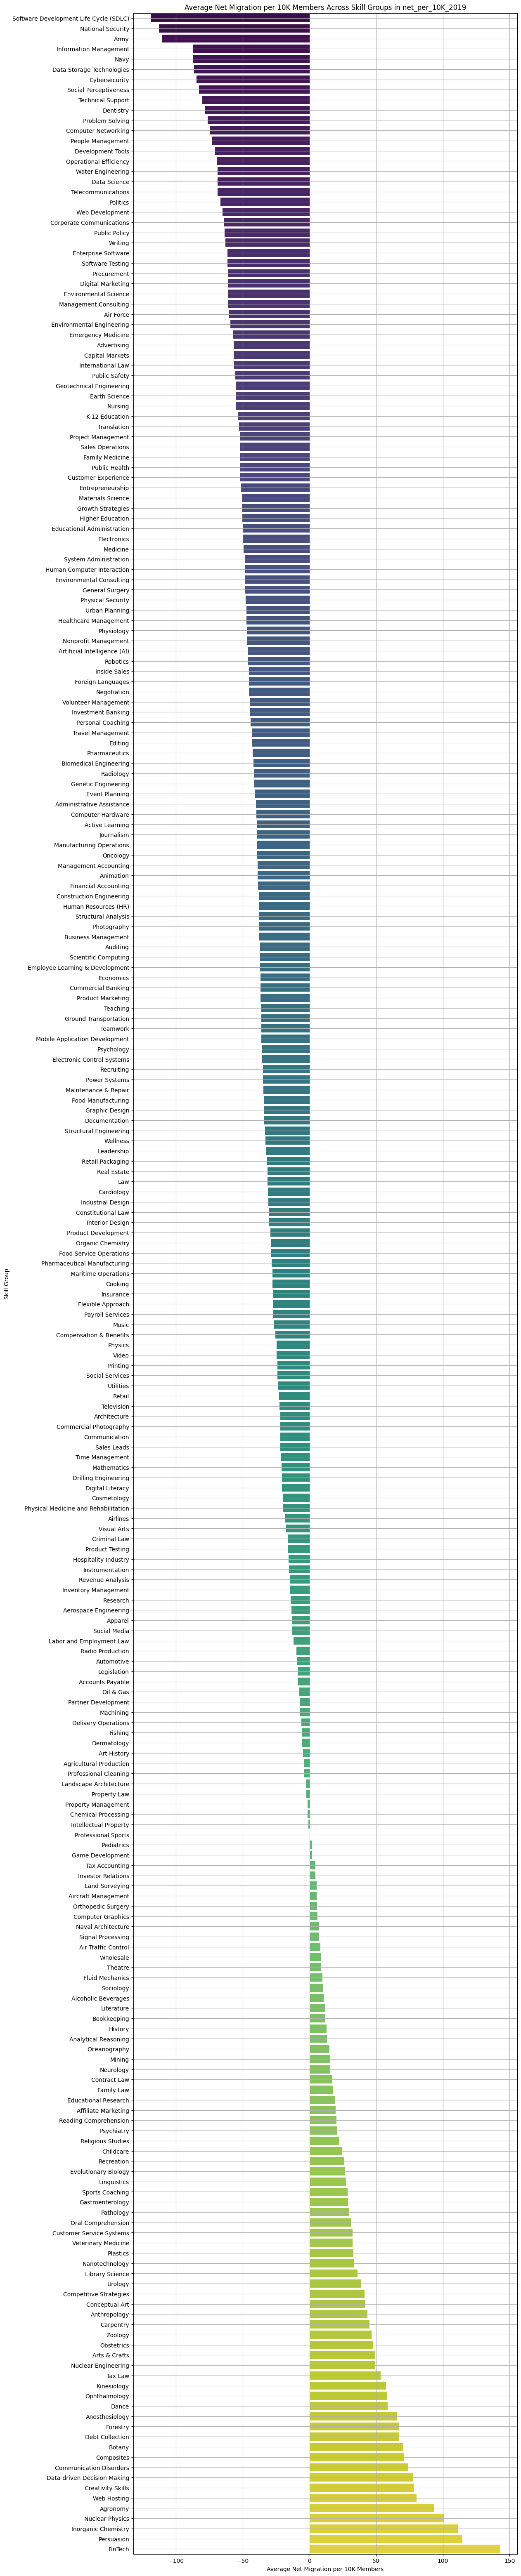

In [61]:
# Choose a specific year to visualize (e.g., 2019)
year = 'avg_net_per_10k'

# Group by skill group and calculate mean net migration for the chosen year
year_data = df.groupby('skill_group_name')[year].mean().sort_values()
# Plotting
plt.figure(figsize=(12, 80))
sns.barplot(x=year_data.values, y=year_data.index, palette='viridis')
plt.title(f'Average Net Migration per 10K Members Across Skill Groups in {year}')
plt.xlabel('Average Net Migration per 10K Members')
plt.ylabel('Skill Group')
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (5,) and (435,)

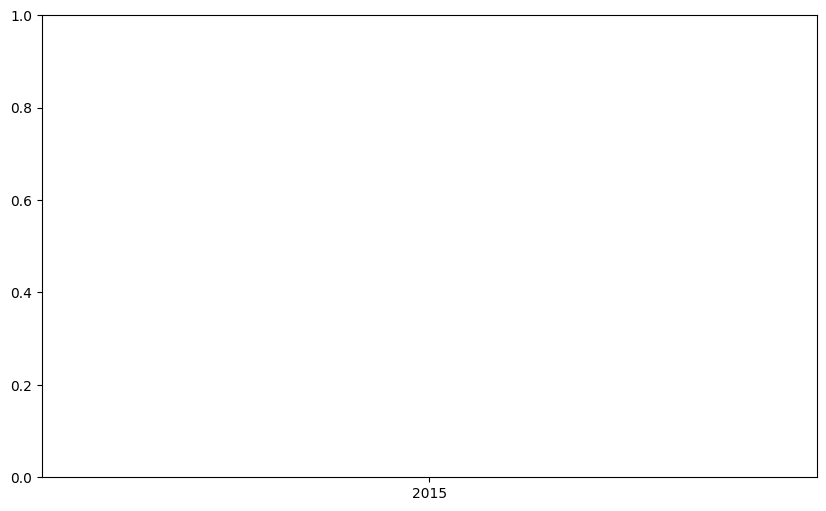

In [59]:
# Choose a skill group to visualize (e.g., 'Information Management')
skill_group = 'Information Management'

# Filter data for the selected skill group
skill_df = df[df['skill_group_name'] == skill_group]

# Select only the relevant years
years = ['2015', '2016', '2017', '2018', '2019']
net_migration = skill_df[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].values.flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, net_migration, marker='o', linestyle='-', color='b')
plt.title(f'Net Migration of LinkedIn Members with {skill_group} Skills')
plt.xlabel('Year')
plt.ylabel('Net Migration per 10K Members')
plt.grid(True)
plt.show()

In [54]:
df.head()

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,avg_net_per_10k
0,af,Afghanistan,Low income,South Asia,2549.0,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79,-787.444
1,af,Afghanistan,Low income,South Asia,2608.0,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09,-928.434
2,af,Afghanistan,Low income,South Asia,3806.0,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64,-925.160
3,af,Afghanistan,Low income,South Asia,50321.0,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51,-779.356
4,af,Afghanistan,Low income,South Asia,1606.0,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64,-898.910


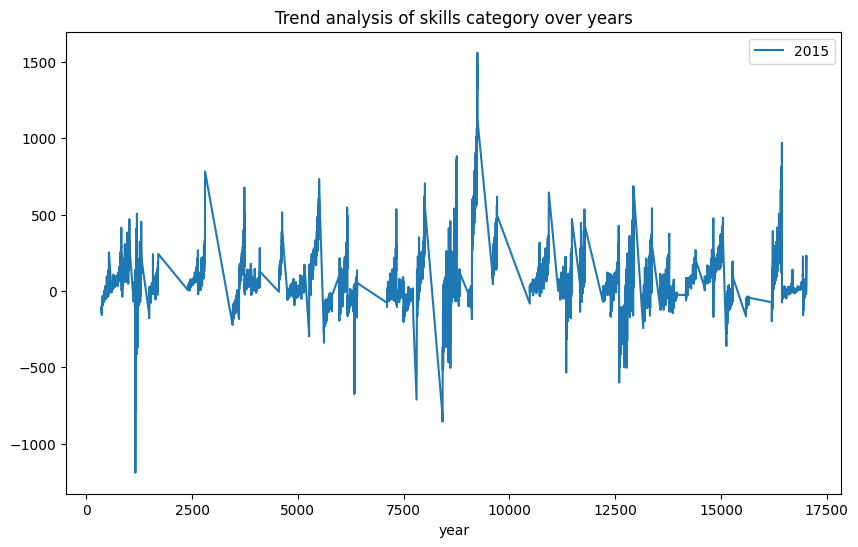

In [33]:
tech_skill = df[df['skill_group_category']=='Tech Skills']
plt.figure(figsize=(10,6))
plt.plot(tech_skill['avg_net_per_10k'],label='2015')
# plt.plot(tech_skill['net_per_10K_2016'],label='2015')
# plt.plot(tech_skill['net_per_10K_2017'],label='2015')
# plt.plot(tech_skill['net_per_10K_2018'],label='2015')
# plt.plot(tech_skill['net_per_10K_2019'],label='2015')
plt.title('Trend analysis of skills category over years')
plt.xlabel('year')
plt.legend()
plt.show()

In [ ]:
mean_by_country = df.groupby('country_name')[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()
mean_by_country.head(5)

In [ ]:
df.head(5)

In [ ]:
a = df.groupby(['country_name','skill_group_category'])[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()

In [ ]:
a.head(50)

In [ ]:
 b = df.groupby(['wb_region','skill_group_category'])[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()

In [ ]:
b.head(50)

In [ ]:
a = df.groupby([df['country_name']=='India','skill_group_name'])[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()

In [ ]:
df_india = df[df['country_name'] == 'India']
a =df_india.groupby('skill_group_category')[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()
a.head(50)

In [ ]:
df_india = df[df['country_name'] == 'United States']
a =df_india.groupby('skill_group_category')[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()
a.head(50)

In [ ]:
df['skill_group_category'].nunique()

In [ ]:
df.head(5)

In [ ]:
import matplotlib.pyplot as plt

# Example: Plotting trend of a specific skill group over years
skill_trend = df[df['skill_group_name'] == 'Software Testing']

plt.figure(figsize=(10,6))
plt.plot(skill_trend['net_per_10K_2015'], label='2015')
plt.plot(skill_trend['net_per_10K_2016'], label='2016')
plt.plot(skill_trend['net_per_10K_2017'], label='2017')
plt.plot(skill_trend['net_per_10K_2018'], label='2018')
plt.plot(skill_trend['net_per_10K_2019'], label='2019')
plt.title('Trend Analysis for Information Management Skills')
plt.xlabel('Year')
plt.ylabel('Net per 10K')
plt.legend()
plt.show()
